## Food Desert Specification
In this notebook, we will attempt to create an food desert classification on the following geographical area:

* MSOAs

In [1]:
# set up the environment
# import geospatial packages
import geopandas as gpd
import shapely

# import data manipulation modules
import pandas as pd 
import numpy as np 

# import visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# import api keys
from api_keys import stadia_key

## Loading the Data

In [2]:
# import the files
msoa = gpd.read_file("./data/MOSA_2021")

# load the geojson for the supermarket locations
food_store = gpd.read_file("./data/amenities_supermarket.geojson")

# check the crs consistency
print(f"The CRS across the geospatial data is consistent: {food_store.crs == msoa.crs}, using {food_store.crs} and {msoa.crs}")

The CRS across the geospatial data is consistent: False, using EPSG:4326 and EPSG:27700


In [3]:
# standardized to use the British National Grid system
food_store_27700 = food_store.to_crs(epsg = 27700)

## Food Desert Specification
We will test for different specification for food desert:
* Number of supermarket per geographical area
* Number of supermarket per unit area aggregated at a given geographical area level (e.g. MSOA)
* Percentage of area within a defined geographical area level enclosed within 1km radius buffer from any supermarket

Note that in this section, we will only consider food stores classified as "supermarket".


In [12]:
# print the aggregates
print(food_store_27700['shop'].value_counts())

# subset only the supaermarket
supermarket = food_store_27700[food_store_27700["shop"] == "supermarket"]

shop
convenience    29573
supermarket    10278
health_food     1011
grocery          131
Name: count, dtype: int64


### Specification 1 - Number of Supermarket per Geographical Area


In [16]:
# get a subset of areas to consider
area = msoa.sample(frac = 1, random_state = 2022, replace = False)
# return the number of supermarket in the field
# instantiate an empty column
area["n_supermarket"] = 0
for id, data in area.iterrows():
    # get the number of supermarket in the area
    supermarket_in_area = supermarket[supermarket.geometry.within(data.geometry)]
    area.loc[id,"n_supermarket"] = len(supermarket_in_area)


In area Adur 002, there are 0 supermarkets.
In area Portsmouth 003, there are 0 supermarkets.
In area Central Bedfordshire 008, there are 0 supermarkets.
In area Ashfield 006, there are 1 supermarkets.
In area Sheffield 046, there are 1 supermarkets.
In area Pembrokeshire 001, there are 0 supermarkets.
In area Redbridge 033, there are 0 supermarkets.
In area Flintshire 005, there are 0 supermarkets.
In area Bolton 035, there are 0 supermarkets.
In area Luton 008, there are 1 supermarkets.
In area Ipswich 008, there are 0 supermarkets.
In area Breckland 002, there are 0 supermarkets.
In area Harrow 012, there are 2 supermarkets.
In area Reading 020, there are 0 supermarkets.
In area Wychavon 007, there are 0 supermarkets.
In area Oldham 010, there are 0 supermarkets.
In area Calderdale 015, there are 3 supermarkets.
In area Blackburn with Darwen 011, there are 0 supermarkets.
In area East Staffordshire 014, there are 0 supermarkets.
In area Dorset 036, there are 0 supermarkets.
In area 

In [59]:
# create bins
area['n_supermarket_bin'] = pd.cut(area['n_supermarket'], bins = [ 0,1,5,10, 13],labels= ["1","2-5","6-10", "10+"], right= True)

(54019.25349999955, 684303.1164999997, -27272.99899500003, 690146.230895001)

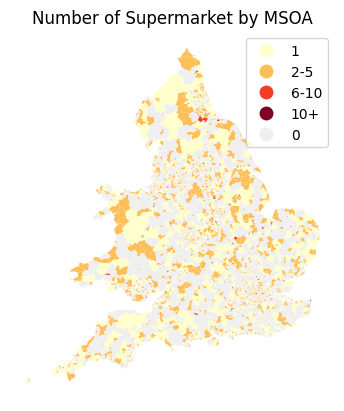

In [70]:
# create map plot
area.plot(column = "n_supermarket_bin",cmap = 'YlOrRd', legend = True,missing_kwds = {'color' : "#EFEFEF", 'label': 0})
plt.title("Number of Supermarket by MSOA")
plt.axis("off")

In [ ]:
# return the area of the geometry